In [64]:
import pandas as pd
import numpy as np

# for graphs
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# for training model
import tensorflow
from tensorflow import keras
from keras.layers import LSTM, Input, Dropout, Dense, RepeatVector, TimeDistributed
from keras.models import Sequential, Model


In [48]:
nepse = pd.read_csv('/Users/ruruthapa/Downloads/nepsealpha_export_price_NEPSE_2013-08-12_2023-08-01.csv')

In [49]:
nepse

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
0,NEPSE,2023-08-01,2106.06,2124.32,2070.33,2077.58,-1.35,1.924435e+09
1,NEPSE,2023-07-31,2097.85,2126.57,2094.06,2106.18,0.27,1.858002e+09
2,NEPSE,2023-07-30,2126.85,2138.67,2091.50,2100.34,-1.22,2.502887e+09
3,NEPSE,2023-07-27,2155.49,2165.97,2124.32,2126.48,-1.37,2.425781e+09
4,NEPSE,2023-07-26,2168.46,2186.49,2152.54,2156.20,-0.37,2.432509e+09
...,...,...,...,...,...,...,...,...
2275,NEPSE,2013-08-18,540.00,540.00,540.00,540.00,0.00,0.000000e+00
2276,NEPSE,2013-08-15,536.00,536.00,536.00,536.00,0.00,0.000000e+00
2277,NEPSE,2013-08-14,537.00,537.00,537.00,537.00,0.00,0.000000e+00
2278,NEPSE,2013-08-13,538.00,538.00,538.00,538.00,0.00,0.000000e+00


In [50]:
nepse['Date']=pd.to_datetime(nepse['Date']) ## Converting to datetime object

In [35]:
nepse['Date']=nepse['Date'].dt.date

In [51]:
nepse = nepse[['Date','Close','Volume']] ##Keeping relevant columns

In [52]:
nepse

,Date,Close,Volume
0,2023-08-01,2077.58,1.924435e+09
1,2023-07-31,2106.18,1.858002e+09
2,2023-07-30,2100.34,2.502887e+09
3,2023-07-27,2126.48,2.425781e+09
4,2023-07-26,2156.20,2.432509e+09
...,...,...,...
2275,2013-08-18,540.00,0.000000e+00
2276,2013-08-15,536.00,0.000000e+00
2277,2013-08-14,537.00,0.000000e+00
2278,2013-08-13,538.00,0.000000e+00


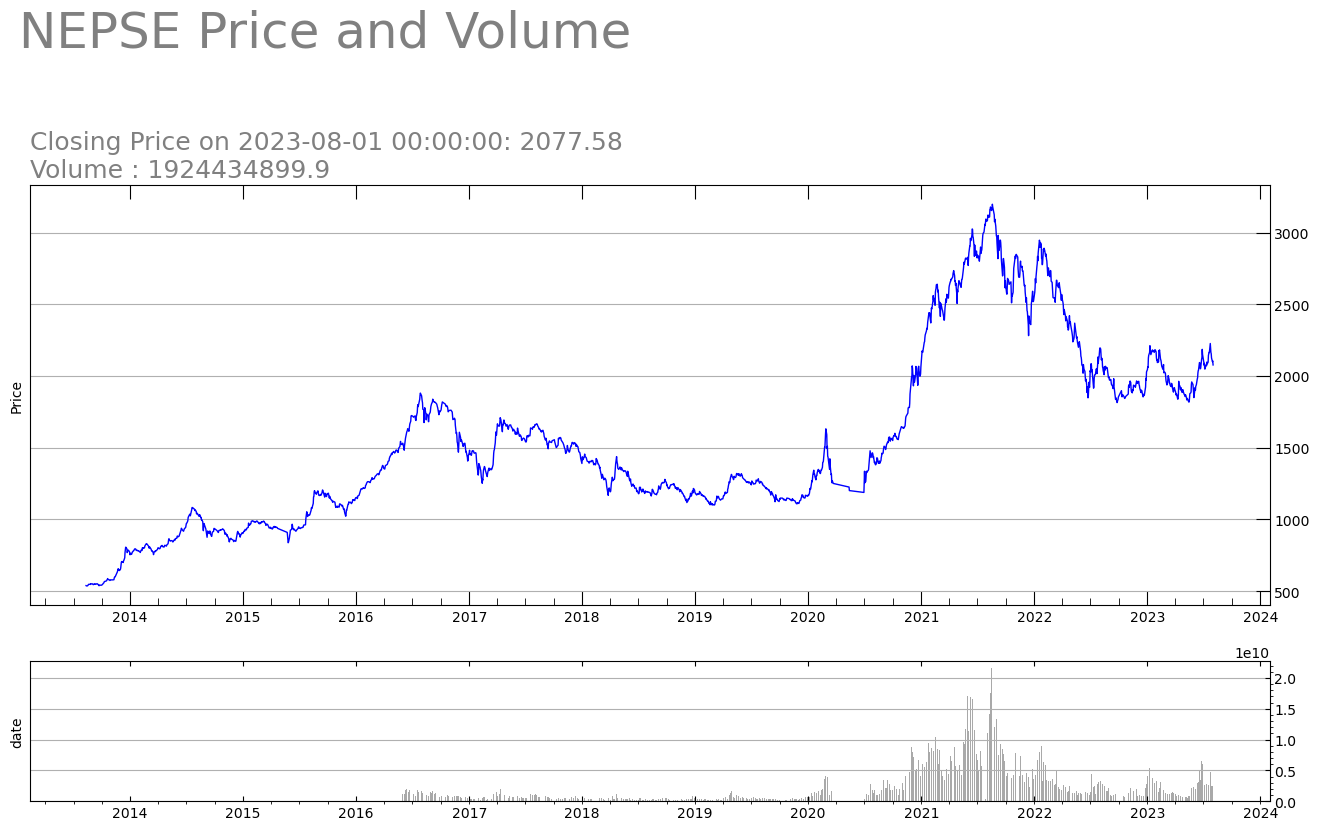

In [57]:
d = nepse['Date'].iloc[0]
p = nepse['Close'].iloc[0]
v = nepse['Volume'].iloc[0]

config_title = {'size': 18, 'color': 'grey', 'ha': 'left', 'va': 'baseline'}

mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8),gridspec_kw={'height_ratios': [3, 1]},sharex=True)
fig.suptitle('NEPSE Price and Volume', size=36, color='grey', x=0.31, y=1.10)

ax[0].plot(nepse['Date'],nepse['Close'],color='blue',linewidth=1)
ax[0].set_ylabel('Price')
plt.minorticks_on()
ax[0].tick_params(direction='in',right=True,top=True,labelsize=10,labelbottom=True, labeltop=False) #for adding scale
ax[0].tick_params(direction='in',which='minor',length=5,bottom=True,right=True)
ax[0].tick_params(direction='in',which='major',length=10)
ax[0].yaxis.grid() #for grid 
ax[0].yaxis.tick_right() #for yaxis moving tick to right
ax[0].set_title(f'Closing Price on {d}: {p} \nVolume : {v}',fontdict=config_title,loc='left')

ax[1].bar(nepse['Date'],nepse['Volume'],color='darkgrey')
ax[1].set_ylabel('date')
plt.minorticks_on()
ax[1].tick_params(direction='in',right=True,top=True,labelsize=10,labelbottom=True, labeltop=False)
ax[1].yaxis.tick_right()
ax[1].yaxis.grid()
#ax[1].set_yticks(np.arange(500000000,25000000000,1000000000))


plt.show()

In [54]:
nepse.query("Date > '2018-08-12'")

,Date,Close,Volume
0,2023-08-01,2077.58,1.924435e+09
1,2023-07-31,2106.18,1.858002e+09
2,2023-07-30,2100.34,2.502887e+09
3,2023-07-27,2126.48,2.425781e+09
4,2023-07-26,2156.20,2.432509e+09
...,...,...,...
1137,2018-08-19,1196.29,2.810530e+08
1138,2018-08-16,1210.32,4.107450e+08
1139,2018-08-15,1209.71,3.158480e+08
1140,2018-08-14,1180.98,1.794390e+08


In [66]:
nepse.loc[nepse['Date']>'2021-08-01']

,Date,Close,Volume
0,2023-08-01,2077.58,1.924435e+09
1,2023-07-31,2106.18,1.858002e+09
2,2023-07-30,2100.34,2.502887e+09
3,2023-07-27,2126.48,2.425781e+09
4,2023-07-26,2156.20,2.432509e+09
...,...,...,...
473,2021-08-08,3108.13,1.430814e+10
474,2021-08-05,3107.45,1.431625e+10
475,2021-08-04,3123.15,1.559579e+10
476,2021-08-03,3111.09,1.152922e+10


In [84]:
train, test = nepse.loc[nepse['Date']<='2021-06-01'], nepse.loc[nepse['Date'] >'2021-06-01']

In [88]:
scaler = StandardScaler()
train['Close'] = scaler.fit_transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

In [85]:
train = train.drop(columns='Volume')

In [86]:
test = test.drop(columns='Volume')

In [89]:
train

,Date,Close
519,2021-06-01,3.393065
520,2021-05-31,3.420375
521,2021-05-30,3.525485
522,2021-05-27,3.496263
523,2021-05-25,3.499062
...,...,...
2275,2013-08-18,-1.810322
2276,2013-08-15,-1.819651
2277,2013-08-14,-1.817319
2278,2013-08-13,-1.814987


In [193]:
test

,Date,Close
0,2023-08-01,1.775553
1,2023-07-31,1.842252
2,2023-07-30,1.828633
3,2023-07-27,1.889595
4,2023-07-26,1.958907
...,...,...
514,2021-06-08,3.833819
515,2021-06-07,3.709189
516,2021-06-06,3.709679
517,2021-06-03,3.592745


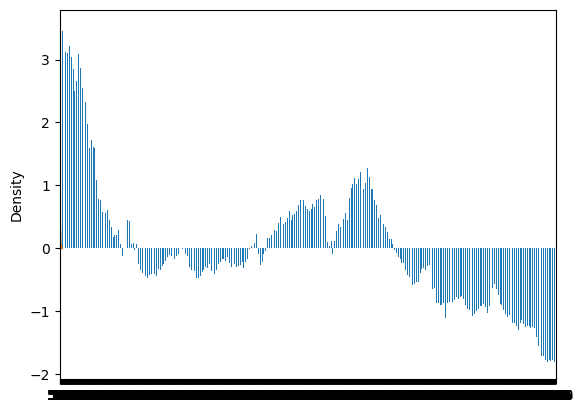

In [95]:
train['Close'].plot(kind='kde')
plt.show()

In [96]:
seq_size = 30

def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []
    
    for i in range(len(x)-seq_size):
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])
        
    return np.array(x_values), np.array(y_values)

In [97]:
X_train, y_train = to_sequences(train[['Close']],train[['Close']],seq_size)
X_test, y_test = to_sequences(test[['Close']],test[['Close']],seq_size)

In [204]:
X_train.shape

(1731, 30, 1)

In [112]:
## define Autoencoder model

model = Sequential()
model.add(LSTM(128,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(X_train.shape[1]))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVecto  (None, 30, 128)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDist  (None, 30, 1)             129       
 ributed)                                               

In [113]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
49/49 [==============================] - 2s 30ms/step - loss: 0.1779 - val_loss: 0.1481
Epoch 2/10
49/49 [==============================] - 1s 27ms/step - loss: 0.0962 - val_loss: 0.0723
Epoch 3/10
49/49 [==============================] - 1s 29ms/step - loss: 0.0849 - val_loss: 0.0998
Epoch 4/10
49/49 [==============================] - 1s 28ms/step - loss: 0.0796 - val_loss: 0.0839
Epoch 5/10
49/49 [==============================] - 1s 29ms/step - loss: 0.0810 - val_loss: 0.2574
Epoch 6/10
49/49 [==============================] - 1s 29ms/step - loss: 0.0764 - val_loss: 0.0352
Epoch 7/10
49/49 [==============================] - 1s 29ms/step - loss: 0.0730 - val_loss: 0.0560
Epoch 8/10
49/49 [==============================] - 1s 29ms/step - loss: 0.0687 - val_loss: 0.0419
Epoch 9/10
49/49 [==============================] - 1s 29ms/step - loss: 0.0699 - val_loss: 0.0510
Epoch 10/10
49/49 [==============================] - 1s 29ms/step - loss: 0.0642 - val_loss: 0.0311


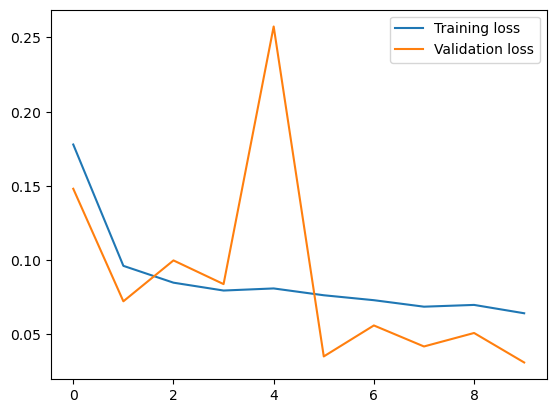

In [117]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

55/55 [==============================] - 1s 8ms/step


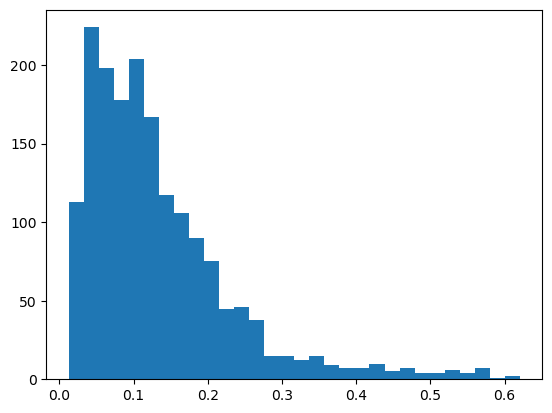

In [118]:
trainPredict = model.predict(X_train)
trainMAE = np.mean(np.abs(trainPredict - X_train), axis=1)
plt.hist(trainMAE, bins=30)
plt.show()

max_trainMAE = 0.4 #DEFINING threshold value

16/16 [==============================] - 0s 8ms/step


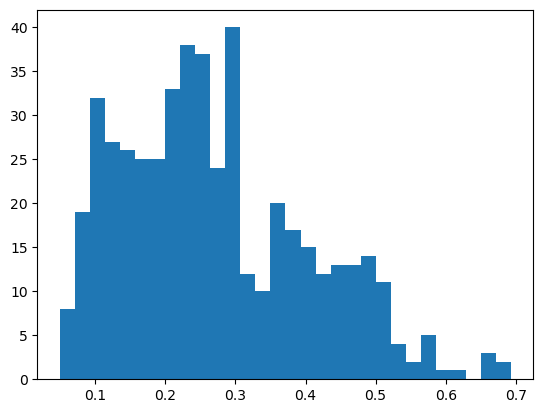

In [119]:
testPredict = model.predict(X_test)
testMAE = np.mean(np.abs(testPredict - X_test), axis=1)
plt.hist(testMAE, bins=30)
plt.show()

In [169]:
max_trainMAE = 0.5 #DEFINING threshold value
anamoly_df = pd.DataFrame(test[seq_size:])
anamoly_df['testMAE'] = testMAE
anamoly_df['max_trainMAE'] = max_trainMAE
anamoly_df['anamoly'] = anamoly_df['testMAE'] > anamoly_df['max_trainMAE']
anamoly_df['Close'] = test[seq_size:]['Close']

In [170]:
anamoly_df

,Date,Close,testMAE,max_trainMAE,anamoly
30,2023-06-19,1.807760,0.098729,0.5,False
31,2023-06-18,1.814616,0.096506,0.5,False
32,2023-06-15,1.692738,0.097583,0.5,False
33,2023-06-14,1.681054,0.103438,0.5,False
34,2023-06-13,1.642760,0.114137,0.5,False
...,...,...,...,...,...
514,2021-06-08,3.833819,0.178995,0.5,False
515,2021-06-07,3.709189,0.171899,0.5,False
516,2021-06-06,3.709679,0.149035,0.5,False
517,2021-06-03,3.592745,0.140067,0.5,False


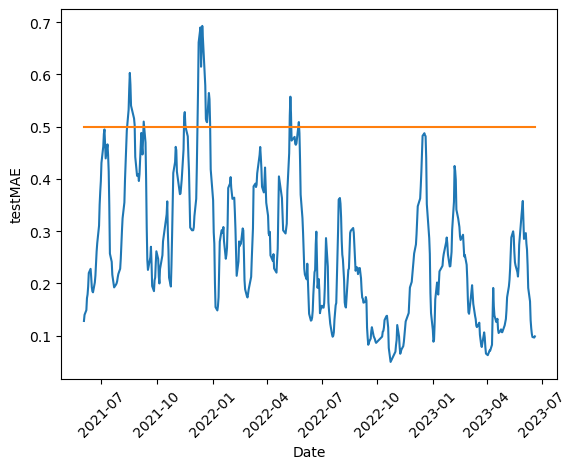

In [171]:
## plotting 
sns.lineplot(x=anamoly_df['Date'],y=anamoly_df['testMAE'])
sns.lineplot(x=anamoly_df['Date'],y=anamoly_df['max_trainMAE'])
plt.xticks(rotation=45)
plt.show()

In [172]:
anamolies = anamoly_df.loc[anamoly_df['anamoly']==True]

In [175]:
len(anamolies)

29

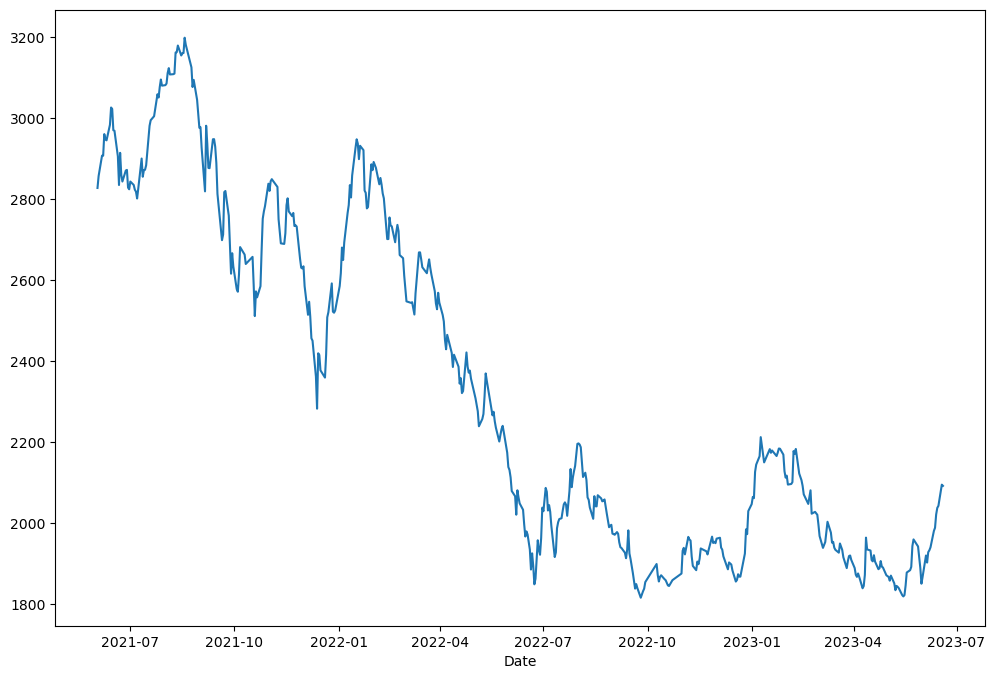

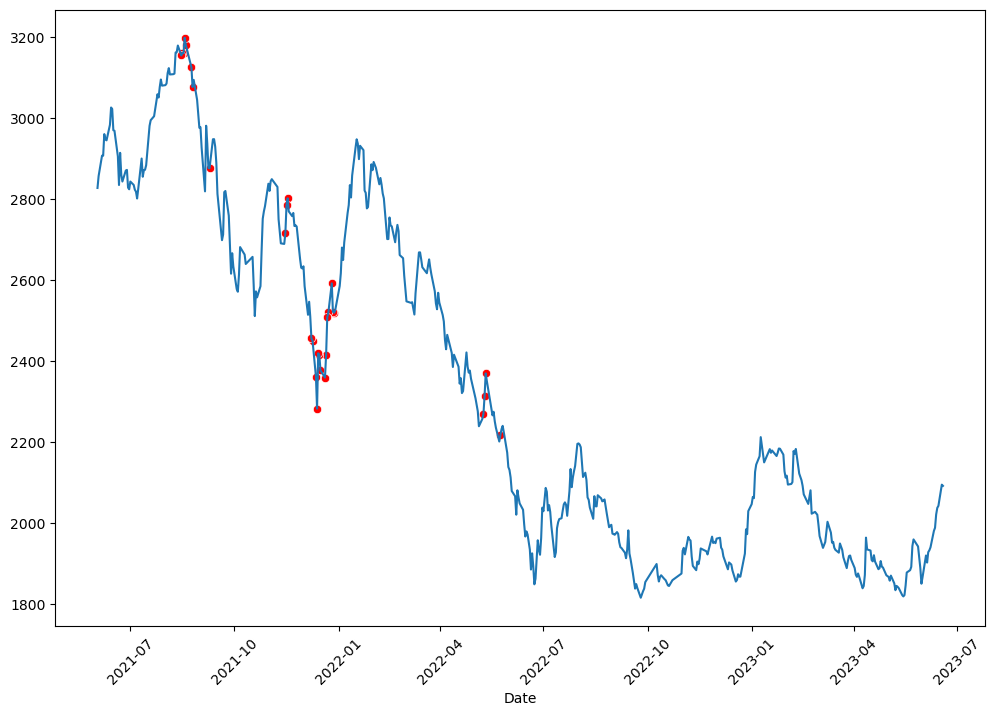

In [176]:
c=scaler.inverse_transform(anamoly_df['Close'].values.reshape(1,-1))
d = scaler.inverse_transform(anamolies['Close'].values.reshape(1,-1))

plt.figure(figsize=(12,8))
sns.lineplot(x=anamoly_df['Date'],y=c.reshape(489))
sns.scatterplot(x=anamolies['Date'],y=d.reshape(len(anamolies)),color='r')
plt.xticks(rotation=45)
plt.show()

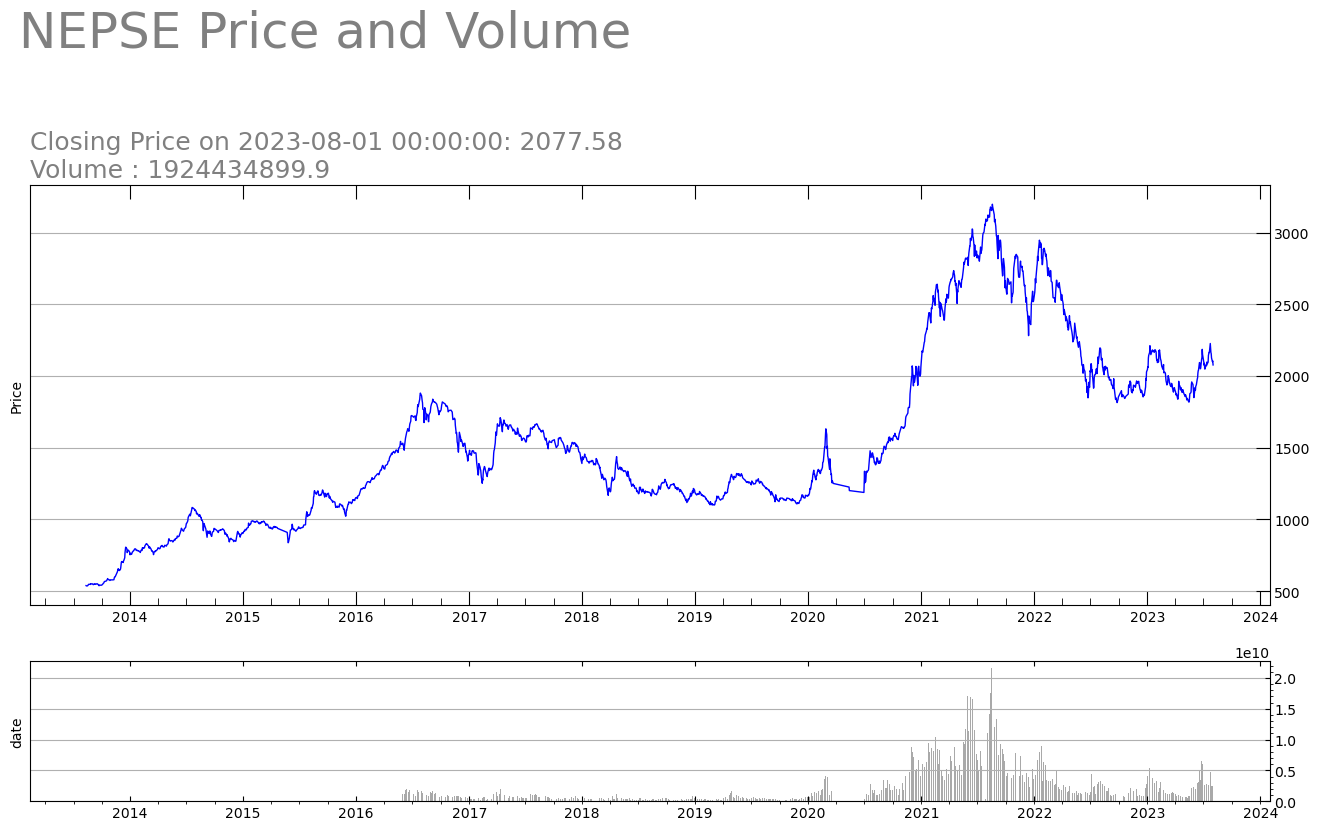

In [167]:
d = nepse['Date'].iloc[0]
p = nepse['Close'].iloc[0]
v = nepse['Volume'].iloc[0]

config_title = {'size': 18, 'color': 'grey', 'ha': 'left', 'va': 'baseline'}

mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8),gridspec_kw={'height_ratios': [3, 1]},sharex=True)
fig.suptitle('NEPSE Price and Volume', size=36, color='grey', x=0.31, y=1.10)

ax[0].plot(nepse['Date'],nepse['Close'],color='blue',linewidth=1)
ax[0].set_ylabel('Price')
plt.minorticks_on()
ax[0].tick_params(direction='in',right=True,top=True,labelsize=10,labelbottom=True, labeltop=False) #for adding scale
ax[0].tick_params(direction='in',which='minor',length=5,bottom=True,right=True)
ax[0].tick_params(direction='in',which='major',length=10)
ax[0].yaxis.grid() #for grid 
ax[0].yaxis.tick_right() #for yaxis moving tick to right
ax[0].set_title(f'Closing Price on {d}: {p} \nVolume : {v}',fontdict=config_title,loc='left')

ax[1].bar(nepse['Date'],nepse['Volume'],color='darkgrey')
ax[1].set_ylabel('date')
plt.minorticks_on()
ax[1].tick_params(direction='in',right=True,top=True,labelsize=10,labelbottom=True, labeltop=False)
ax[1].yaxis.tick_right()
ax[1].yaxis.grid()
#ax[1].set_yticks(np.arange(500000000,25000000000,1000000000))


plt.show()

In [177]:
testPredict = model.predict(X_test)
testMAE = np.mean(np.abs(testPredict - X_test), axis=1)
plt.hist(testMAE, bins=30)
plt.show()

,Date,Close
0,2023-08-01,1.775553
1,2023-07-31,1.842252
2,2023-07-30,1.828633
3,2023-07-27,1.889595
4,2023-07-26,1.958907
...,...,...
514,2021-06-08,3.833819
515,2021-06-07,3.709189
516,2021-06-06,3.709679
517,2021-06-03,3.592745
